<a href="https://colab.research.google.com/github/sararst/MLDL_2023/blob/main/Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!git clone https://github.com/sararst/MLDL_2023

Cloning into 'MLDL_2023'...
fatal: could not read Username for 'https://github.com': No such device or address


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.datasets import load_digits
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

Train a knn on MNIST

In [4]:
n_neighbors = 5
random_state = 0
X, y = load_digits(return_X_y=True) # Load Digits dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, stratify=y, random_state=random_state, shuffle=True)# Split into train/test

knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
_, _, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

In [6]:
print(f'accuracy: {acc}')
print(f'f1-score:  {f1}')

accuracy: 0.9506258692628651
f1-score:  0.9504817378672602


apply PCA

In [11]:
# Reduce dimension to 2 with PCA
# pca = make_pipeline(MaxAbsScaler(), PCA(n_components=2, random_state=42))
# # knn = KNeighborsClassifier(n_neighbors=n_neighbors)
# X_pca = pca.fit_transform(X_train) # Fit the method's model
# X_test_pca = pca.transform(X_test)
# knn.fit(X_pca, y_train)
# y_pred = knn.predict(X_test_pca)
# acc_knn = accuracy_score(y_test, y_pred)
# _, _, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')


In [13]:
pca = make_pipeline(StandardScaler(), PCA(n_components=2, random_state=random_state))
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
pca.fit(X_train, y_train) # Fit the method's model
knn.fit(pca.transform(X_train), y_train)
acc_knn = knn.score(pca.transform(X_test), y_test)

In [15]:
print(f'accuracy: {acc}')
print(f'f1-score:  {f1}')

accuracy: 0.9506258692628651
f1-score:  0.581088448842475


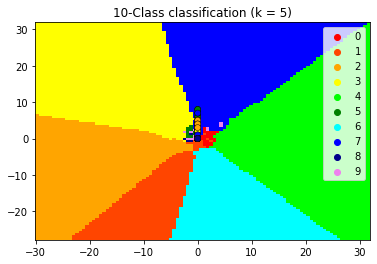

In [22]:
cmap_light = ListedColormap(['red', 'orangered',  'orange', 'yellow', 'lime', 'green', 'cyan', 'blue', 'darkblue', 'violet'])
cmap_bold = ['red', 'orangered',  'orange', 'yellow', 'lime', 'green', 'cyan', 'blue', 'darkblue', 'violet']
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
      knn, PCA(2).fit_transform(X_train), # pass here your classifier and data
      cmap=cmap_light, ax=ax,
      response_method="predict", plot_method="pcolormesh",
      shading="auto",
    )

# Plot also the training points
sns.scatterplot(
      x=X[:, 0],
      y=X[:, 1],
      hue=load_digits().target_names[y],
      palette=cmap_bold,
      alpha=1.0,
      edgecolor="black",
    )
plt.title(
      "10-Class classification (k = %i)" % (n_neighbors)
    )
plt.show()